# MiniProject1
**Laptop Price Dataset Analysis**
<br>
Name: Alon Hillel
<br>
GitHub URL: https://github.com/HillelAlon/MiniProject1


## Import the libraries and the dataset
After data loading I display the first 5 rows and the info of the data.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('laptop_price - dataset.csv')
print(f"laptop_price - dataset: First 5 rows\n")
print(df.head())
print(f"\n\nlaptop_price - dataset: Info\n")
print(df.info())


laptop_price - dataset: First 5 rows

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD     

## Plot the price of all the laptops
I prefer to create a graph whose x-axis is a price range and whose y-axis is a percentage distribution. The first column is 0-500 (Euros), the second is 500-1000 (Euros), etc.

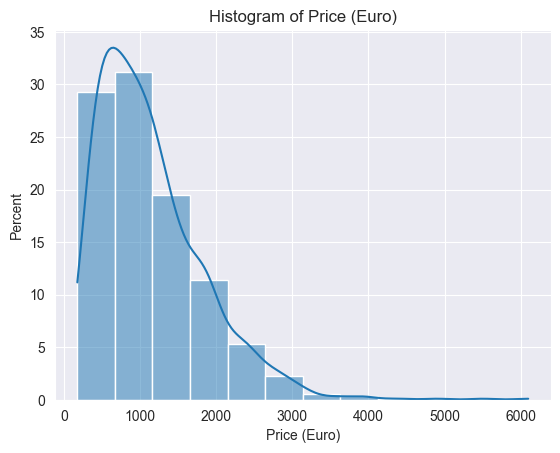

In [2]:
sns.histplot(df['Price (Euro)'], kde=True,stat='percent', binwidth=500,).set(title='Histogram of Price (Euro)');

## Average Laptop Price - divided by company
Here I show which company has on average the most expensive laptop and what is the average laptop price for each company.

The company with the most expensive laptop price on average: Razer
Razer Laptop average price (Euro): 3346.14


,Company,Price (Euro)
17,Vero,217.425000
12,Mediacom,295.000000
3,Chuwi,314.296667
0,Acer,633.464455
5,Fujitsu,729.000000
7,HP,1080.314664
10,Lenovo,1093.862215
2,Asus,1123.829737
18,Xiaomi,1133.462500
4,Dell,1199.225120


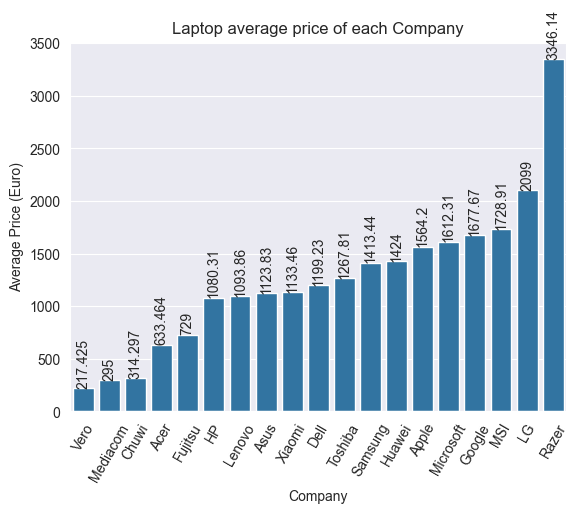

In [3]:
result = df.groupby('Company')['Price (Euro)'].mean().reset_index().sort_values('Price (Euro)')
ax = sns.barplot(df, x='Company', y='Price (Euro)',estimator="mean",order=result['Company'], errorbar=None)
ax.tick_params(axis='x', rotation=60,)
ax.bar_label(ax.containers[0], fontsize=10,rotation=90)
ax.set_ylabel('Average Price (Euro)')
ax.set_title('Laptop average price of each Company')

price_of_expensive_laptop = result["Price (Euro)"].max()#find the price of the most expensive company
expensive_company = result.loc[result["Price (Euro)"] == price_of_expensive_laptop]["Company"].iloc[0] #find the name of the most expensive company
print("The company with the most expensive laptop price on average:", expensive_company)
print(expensive_company, "Laptop average price (Euro):", round(price_of_expensive_laptop, 2))

result

## Operating Systems - fix them to be uniform
Finding the different types of Operating systems present in the data - under the column name "OpSys".

In [4]:
print(f"Operating Systems types: {df["OpSys"].unique()}")

#MacOS, mac OS X => Mac OS
df['OpSys'].replace(['macOS', 'Mac OS X'], 'Mac OS', inplace=True)

#Windows 10, Windows 10 S, Windows 7 => Windows
df['OpSys'].replace(['Windows 10', 'Windows 10 S', 'Windows 7'], 'Windows', inplace=True)

#No OS, Linux, Android and Chrome OS will not change

print(f"Operating Systems types after fixation: {df["OpSys"].unique()}")

Operating Systems types: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Operating Systems types after fixation: ['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

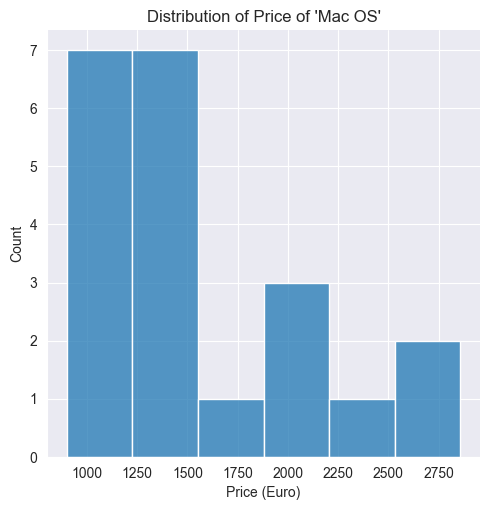

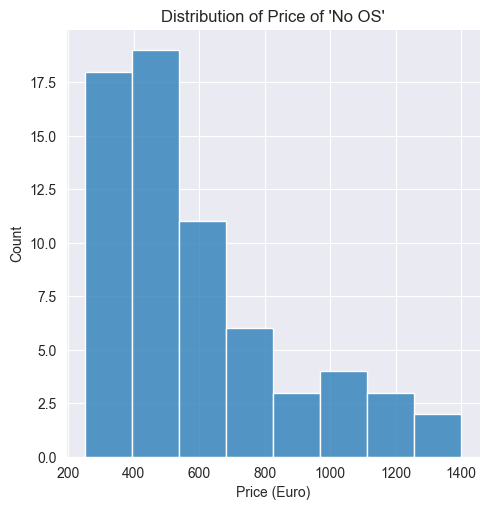

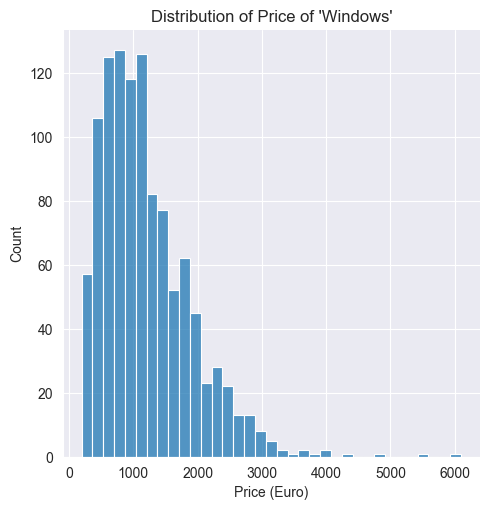

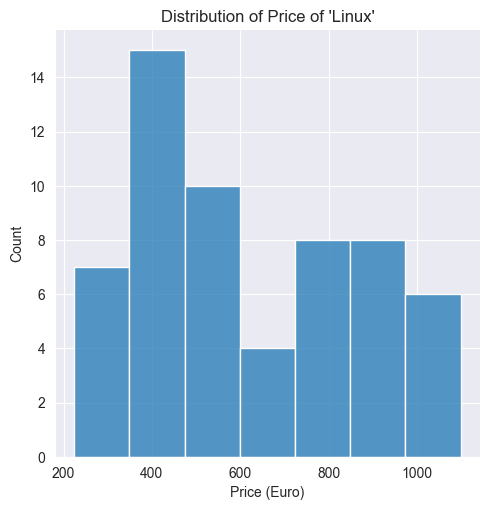

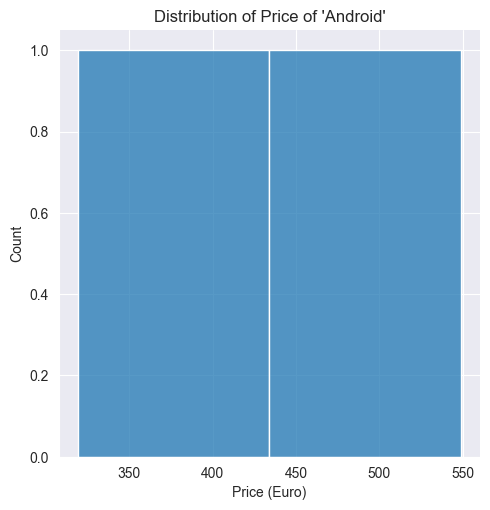

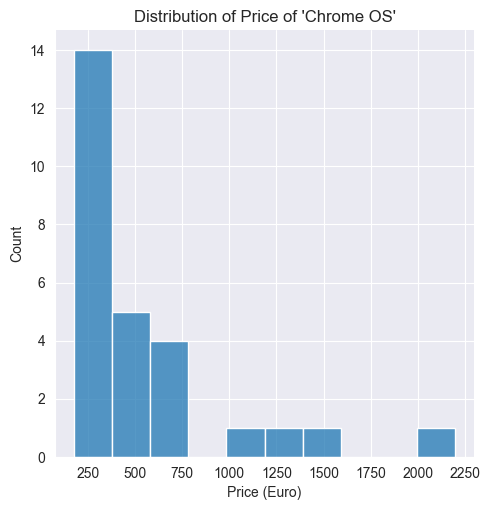

In [5]:
for OS in df['OpSys'].unique().tolist():
    df1 = df[df['OpSys'] == OS]
    sns.displot(df1, x="Price (Euro)",stat='count').set(title=f"Distribution of Price of '{OS}'")

## Relationship Between RAM and Price
Here I present the relationship between RAM and the price of the computer.
<br>
I decided to define 64GB as an outlier because there are not many laptops of this size (I know I could have used IQR, but I didn't want to use that because I wanted to include all the data).
<br>
I present one graph with the outliers and two without them.

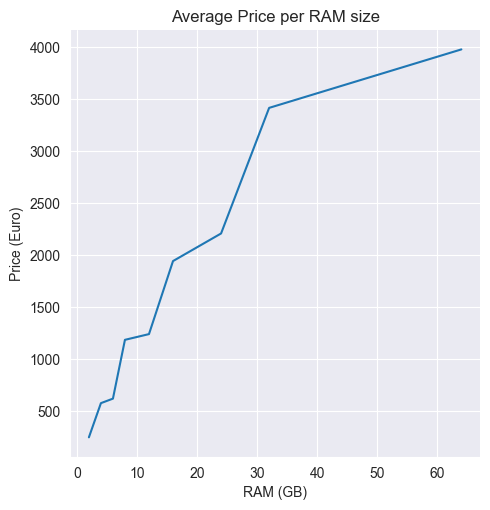

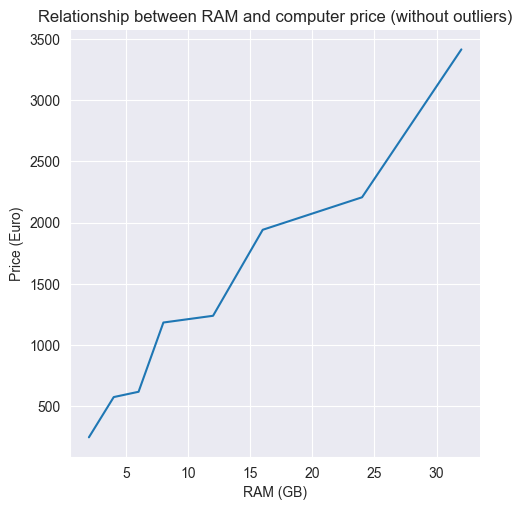

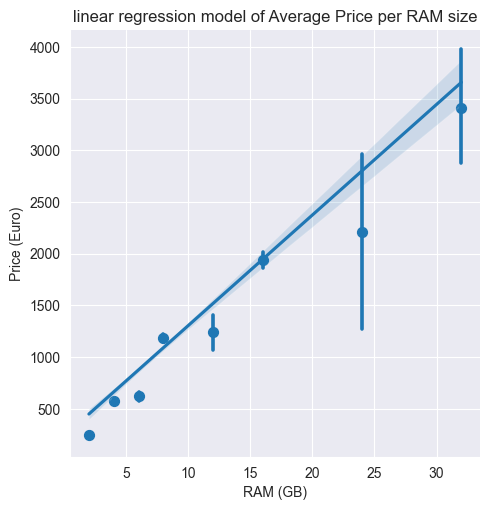

In [6]:
plot1 = sns.relplot(data=df, kind="line", x="RAM (GB)", y="Price (Euro)", errorbar=None,).set(title="Average Price per RAM size")

df2 = df[df['RAM (GB)'] != 64]
plot2 = sns.relplot(data=df2, kind="line", x="RAM (GB)", y="Price (Euro)", errorbar=None,).set(title="Relationship between RAM and computer price (without outliers)")

plot3 = sns.lmplot(x="RAM (GB)", y="Price (Euro)", data=df2, x_estimator=np.mean).set(title="linear regression model of Average Price per RAM size");


## A new column - Storage Type
Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".
<br>
* For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.


In [7]:
def memory_to_storage_type(memory) -> str: #The function will take the whole str and keep only the storage type.
    my_list = []
    temporary_list = memory.split()
    for item in temporary_list:
        if not item[0].isnumeric():
            my_list.append(item)
    return " ".join(my_list)

df["Storage type"] = df["Memory"].apply(lambda x: memory_to_storage_type(x))

#I print the memory and storage types to see the differences
print(f"Memory types: {df["Memory"].unique()}")
print(f"storage types: {df['Storage type'].unique()}")


#I also print the first 10 rows (only relevant columns the assignment)


Memory types: ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']
storage types: ['SSD' 'Flash Storage' 'HDD' 'SSD + HDD' 'SSD + SSD' 'Hybrid'
 'Flash Storage + HDD' 'HDD + HDD' 'SSD + Hybrid']
